
#                                     CUSTOMER PURCHASE PREDICTION


## Problem Statement

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not. Using this dataset, we will use machine learning to develop a model that attempts to predict whether a customer will decide to buy the specific product or not.

## Data Definition

User ID: the unique ID of each customer

Gender: Female/Male

Age: integer value between 18 and 60 years old

Estimated Salary: integer values between 15K and 150K

Purchased: 0 - didn't purchase, 1 - purchased the product

# Importing Libraries

In [65]:
# Importing Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import statsmodels
import statsmodels.api as sm

# Set options

In [66]:
# setting the plot size using 'rcParams'
plt.rcParams['figure.figsize'] = [15,8]

In [67]:
# displaying all columns of the dataframe
pd.options.display.max_columns = None

# displaying all rows of the dataframe
pd.options.display.max_rows = None

# using the below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# Read Data

In [68]:
# reading the data file
df_customer=pd.read_csv(r"D:\PGA11\Capstone Project\Customer_Behaviour.csv")
df_customer.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Prepare and analyze the Data

In [69]:
# Dimensions of the data
df_customer.shape

(400, 5)

### Data type

In [70]:
#Checking for Datatype
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [71]:
#Dropping the unnecessary column
df_customer.drop(['User ID'], axis=1, inplace=True)

### Summary statistics

In [72]:
# By default the describe function returns the summary of numerical variables
df_customer.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [73]:
# summary of categorical variables
df_customer.describe(include="object")

,Gender
count,400
unique,2
top,Female
freq,204


<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

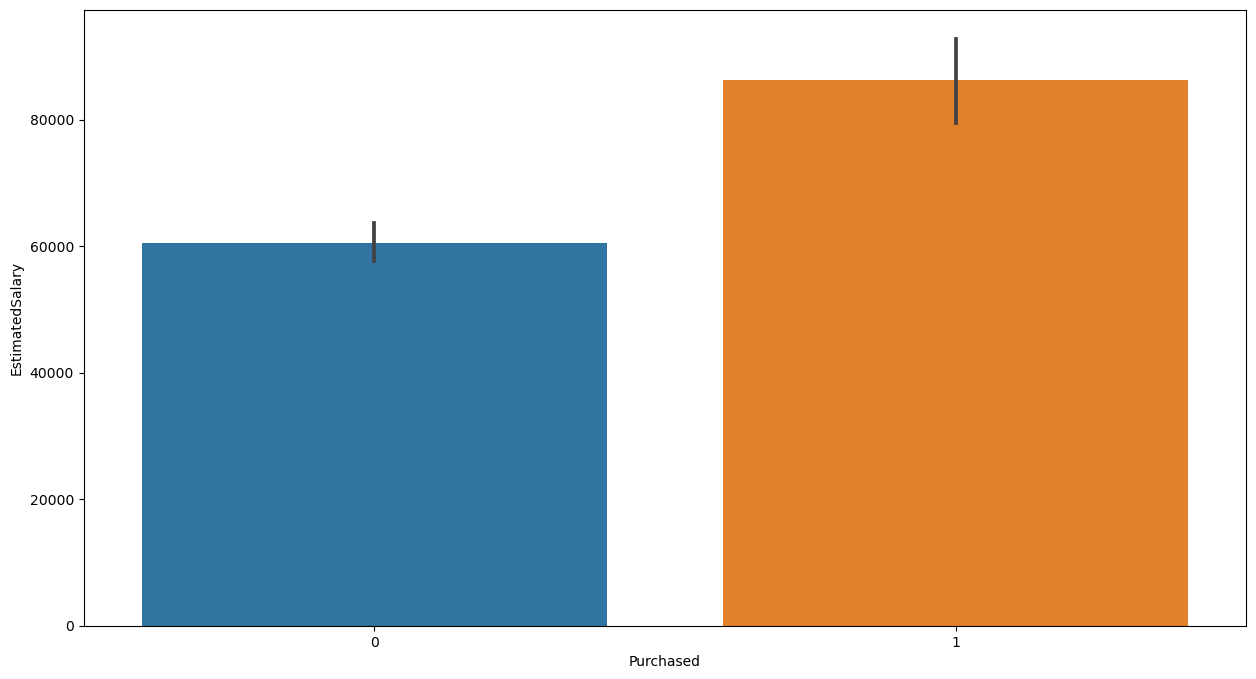

In [74]:
# creating a barplot for Purchased and EstimatedSalary
sns.barplot('Purchased', 'EstimatedSalary', data=df_customer)

### Detecting the outliers

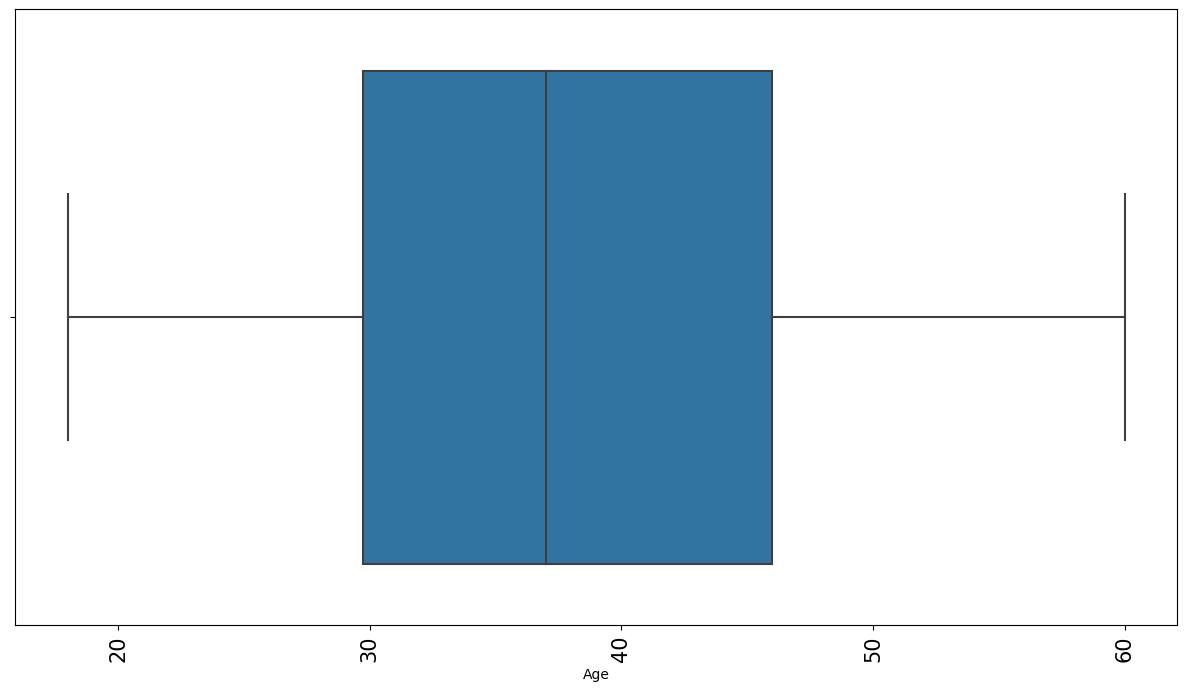

In [11]:
# plotting boxplot for "Age"
sns.boxplot(df_customer['Age'])

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()


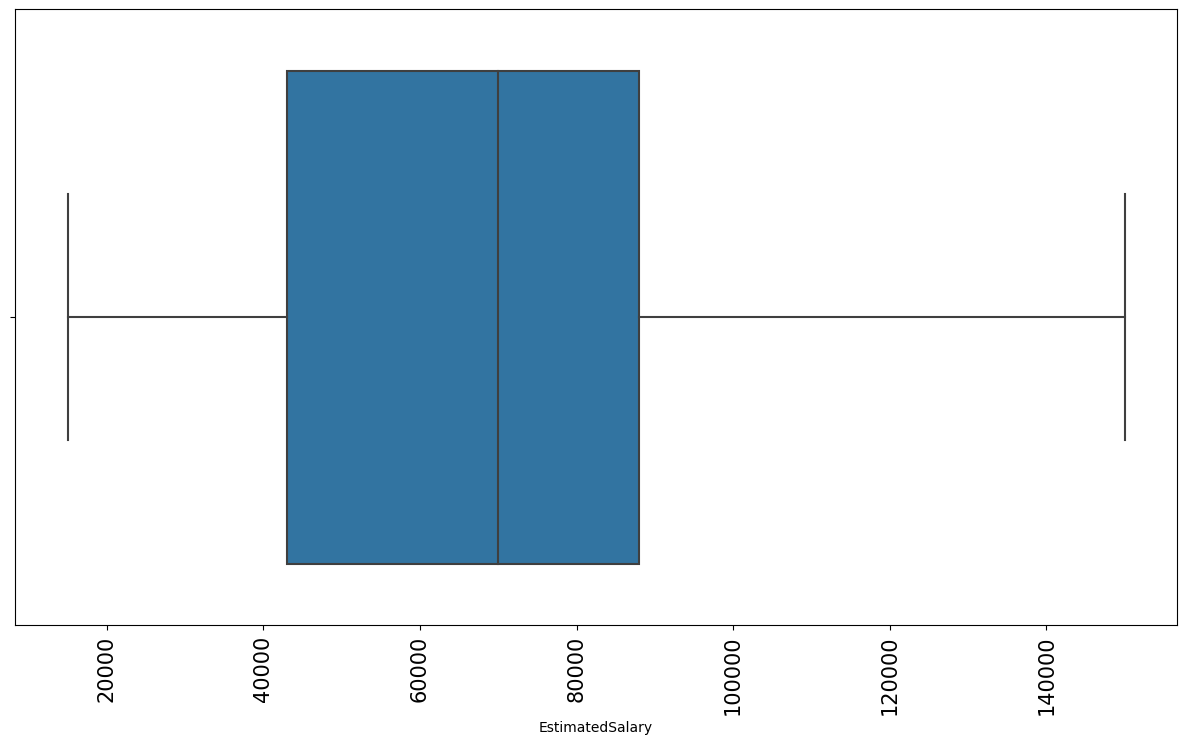

In [12]:
# plotting boxplot for "EstimatedSalary"
sns.boxplot(df_customer['EstimatedSalary'])

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

### Distribution of variables

In [13]:
# splitting features and the target variable
df_features = df_customer.iloc[:, df_customer.columns != 'Purchased']
df_target = df_customer.iloc[:, df_customer.columns == 'Purchased']

In [14]:
# counts of 0's and 1's in the 'Purchased' variable using 'value_counts()'
# storing the values in 'class_frequency'
class_frequency = df_customer.Purchased.value_counts()
class_frequency

0    257
1    143
Name: Purchased, dtype: int64

### There are a total of 257 customers who have not purchased, and 143 have purchased some products.

### Visualization of target variable

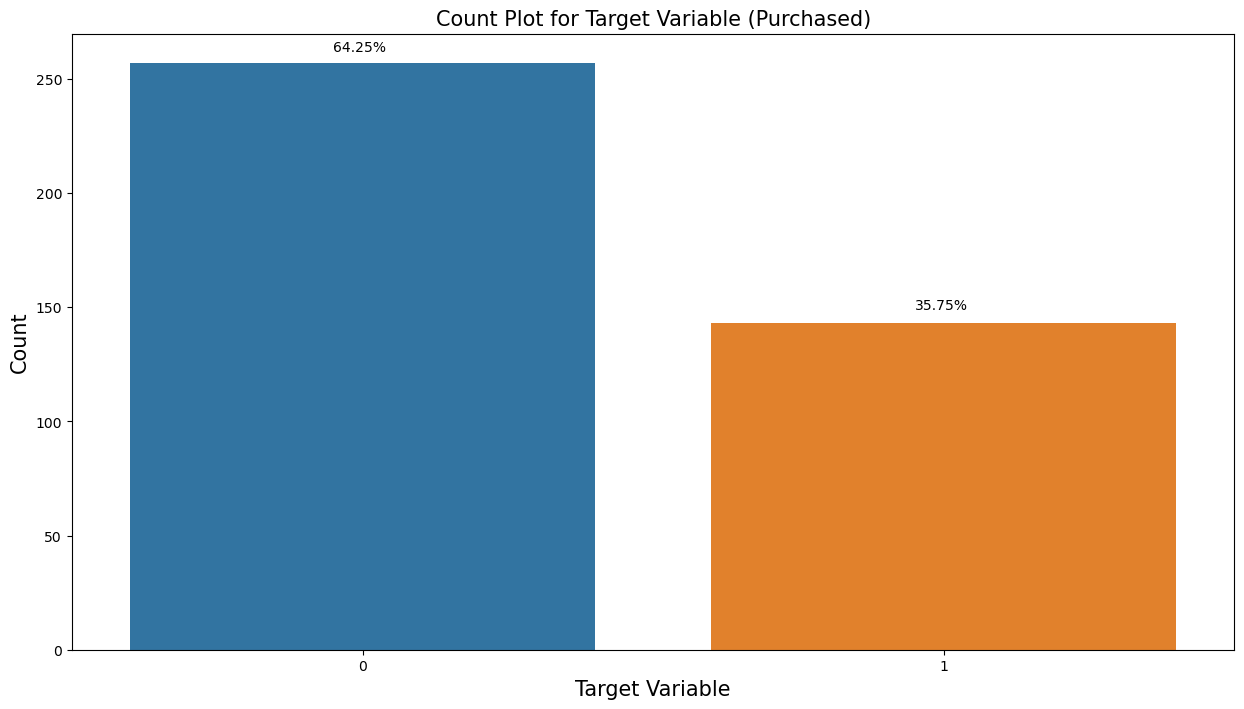

In [15]:
# plot the countplot of the variable 'purchased'
sns.countplot(x = df_target.Purchased)

plt.text(x = -0.05, y = df_target.Purchased.value_counts()[0] + 5,
         s = str(round((class_frequency[0])*100/len(df_target.Purchased),2)) + '%')

plt.text(x = 0.95, y = df_target.Purchased.value_counts()[1] +6,
         s = str(round((class_frequency[1])*100/len(df_target.Purchased),2)) + '%')

plt.title('Count Plot for Target Variable (Purchased)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### Correlation

In [16]:
df_customer.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


### Missing Values

In [17]:
df_customer.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### from the above analysis, it is found that there is no missing values

## Label Encoding

In [18]:
encode=LabelEncoder()
df_features['Gender']=encode.fit_transform(df_features['Gender'])

In [19]:
X=df_features[['Gender','EstimatedSalary']]
y=df_target[['Purchased']]

## Model Building

In [20]:
# creating a generalized function to calculate the metrics values for test set
def get_test_report(model):
    return(classification_report(y_test, y_pred))

In [21]:
def kappa_score(model):
    return(cohen_kappa_score(y_test, y_pred))

In [22]:
# creating a plot of confusion matrix for the model
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [23]:
# creating an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [24]:
# adding the intercept column using 'add_constant()'
X = sm.add_constant(X)
X.head()

,const,Gender,EstimatedSalary
0,1.0,1,19000
1,1.0,1,20000
2,1.0,0,43000
3,1.0,0,57000
4,1.0,1,76000


In [25]:
# splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (280, 3)
y_train (280, 1)
X_test (120, 3)
y_test (120, 1)


## Building model using Logistic Regression

In [26]:
# using fit() to fit the logistic regression model
log_reg_model = sm.Logit(y_train, X_train).fit()
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.589962
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            2
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.1106
Time:                        16:34:59   Log-Likelihood:                -165.19
converged:                       True   LL-Null:                       -185.74
Covariance Type:            nonrobust   LLR p-value:                 1.187e-09
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2351      0.360     -6.211      0.000      -2.940      -1.530
Gender        

In [27]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(X_test)
y_pred_prob.head()

332    0.328267
111    0.375919
352    0.488893
205    0.251414
56     0.256023
dtype: float64

### Since the target variable can take only two values either 0 or 1. We decide the threshold of 0.5. If y_pred_prob is less than 0.5, then consider it to be 0 else consider it to be 1.

In [28]:
# converting probabilities to 0 and 1 using 'if_else'
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]

In [29]:
# converting the predicted values to type 'float32'
y_pred = np.array(y_pred, dtype=np.float32)
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

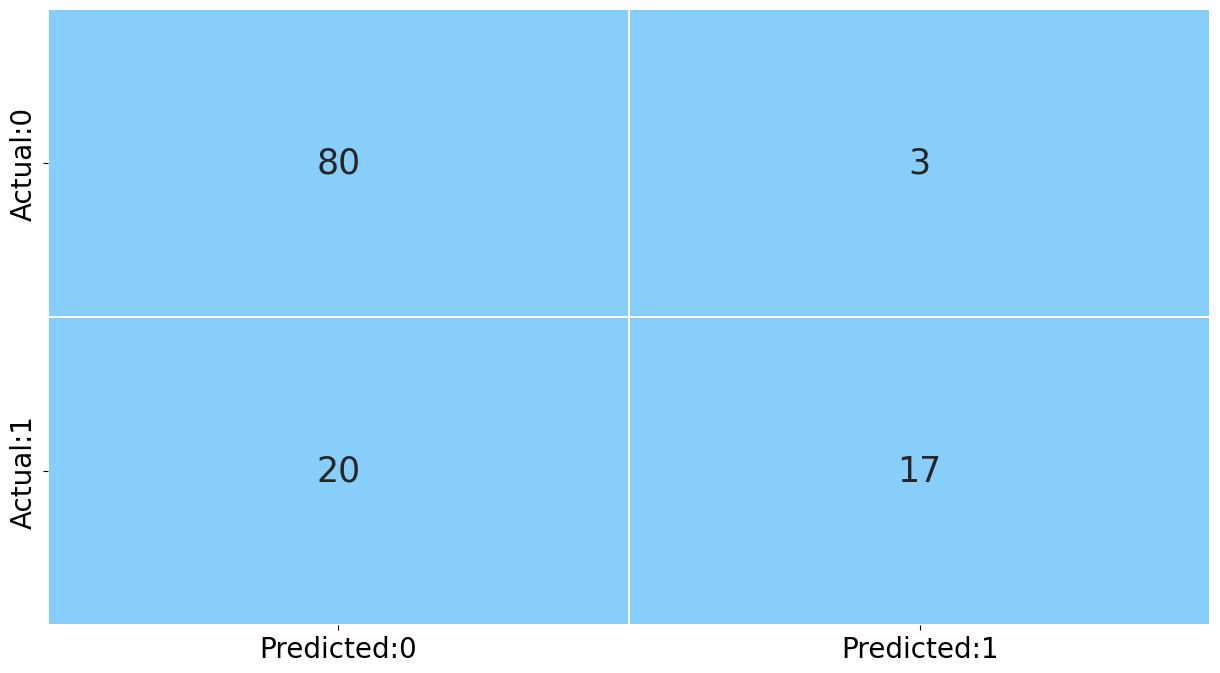

In [30]:
# calling the function to plot confusion matrix
plot_confusion_matrix(log_reg_model)

In [31]:
# calling the function 'get_test_report'
test_report = get_test_report(log_reg_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        83
           1       0.85      0.46      0.60        37

    accuracy                           0.81       120
   macro avg       0.82      0.71      0.74       120
weighted avg       0.82      0.81      0.79       120



###          The accuracy is 81% for this model

In [32]:
# computing kappa score on test set
kappa_value = kappa_score(log_reg_model)
print(kappa_value)

0.4850746268656716


In [33]:
# passing the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.658906,0.85,0.459459,0.808333,0.485075,0.596491


## Building model using Decision Tree

In [34]:
# Building the 'DecisionTreeClassifier' using 'entropy' criterion
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree_model = decision_tree.fit(X_train, y_train)

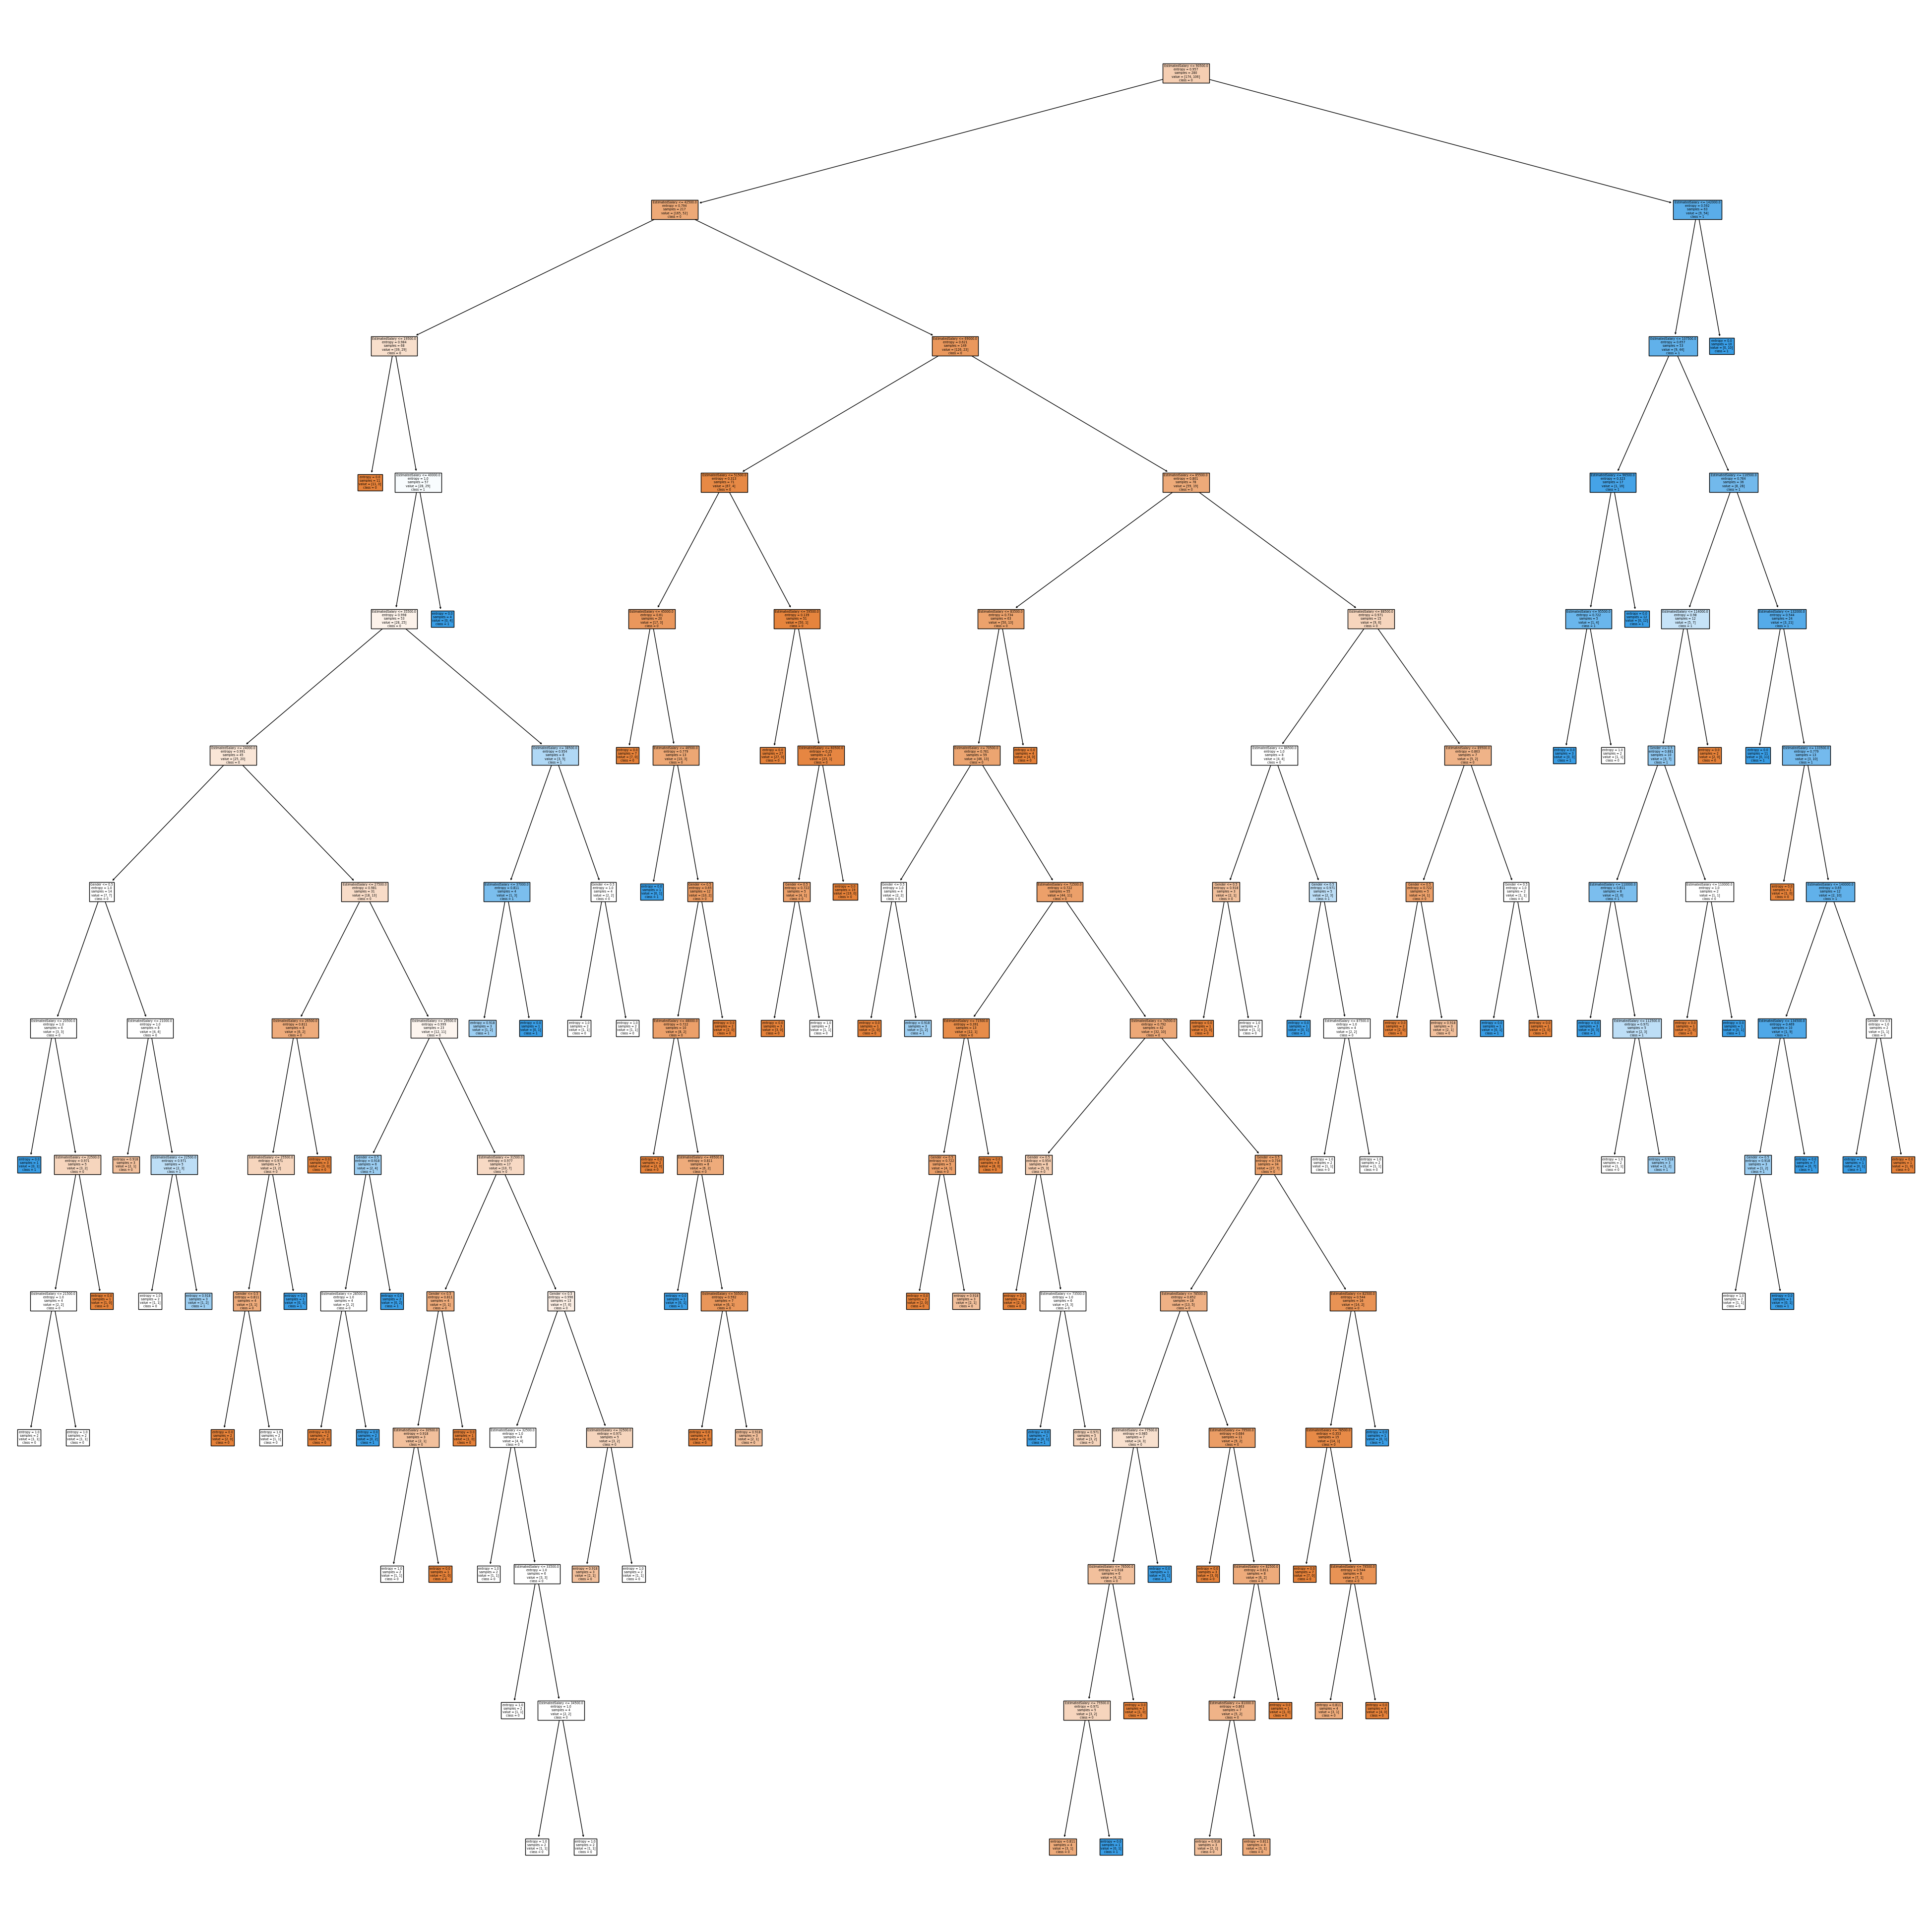

In [35]:
labels = X_train.columns
# ploting the decision tree 
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(decision_tree_model, 
                   feature_names=labels,  
                   class_names=["0","1"],
                   filled=True)

In [36]:
# predicting probabilities on the test set
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]
y_pred_prob

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.66666667,
       0.33333333, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.5       , 0.5       ,
       0.33333333, 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.5       , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.5       , 1.        , 0.33333333, 0.5       ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.5       , 0.5       , 0.        , 1.        , 1.        ,
       0.25      , 0.        , 0.        , 0.        , 0.33333333,
       0.        , 0.5       , 0.66666667, 0.        , 0.     

In [37]:
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]

In [38]:
y_pred = np.array(y_pred, dtype=np.float32)

# printing the first five predictions
y_pred[0:5]

array([0., 0., 1., 0., 0.], dtype=float32)

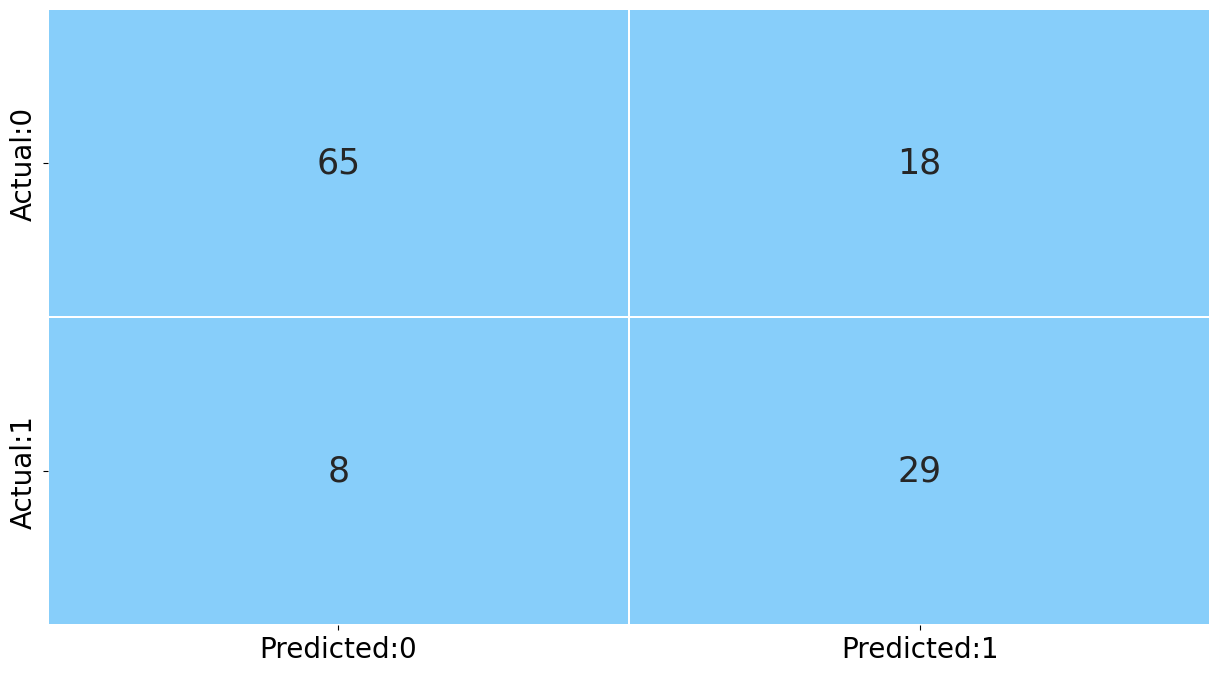

In [39]:
# calling the function to plot confusion matrix
plot_confusion_matrix(decision_tree_model)

In [40]:
# calling the function 'get_test_report'
test_report = get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        83
           1       0.62      0.78      0.69        37

    accuracy                           0.78       120
   macro avg       0.75      0.78      0.76       120
weighted avg       0.81      0.78      0.79       120



### The accuracy is 78% for this model

In [41]:
# computing kappa score on test set
kappa_value = kappa_score(decision_tree_model)
print(kappa_value)

0.5274159345652832


In [42]:
# using the function 'update_score_card' to store the performance measures
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.658906,0.850000,0.459459,0.808333,0.485075,0.596491
1,Decision Tree,0.786389,0.617021,0.783784,0.783333,0.527416,0.690476


## Building model using KNN

In [43]:
# Building the 'KNeighbors Classifier' model
knn_classification = KNeighborsClassifier()
knn_model = knn_classification.fit(X_train, y_train)

In [44]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [45]:
y_pred = np.array(y_pred, dtype=np.float32)
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

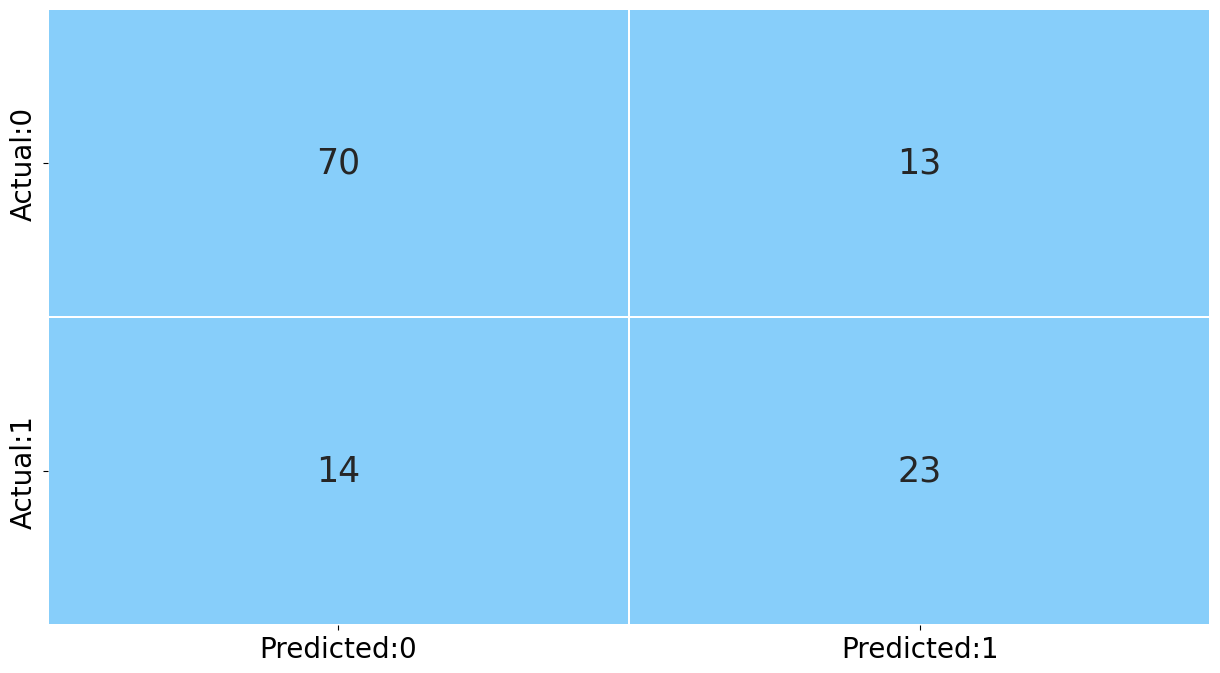

In [46]:
# calling the function to plot confusion matrix
plot_confusion_matrix(knn_model)

In [47]:
# calling the function 'get_test_report'
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        83
           1       0.64      0.62      0.63        37

    accuracy                           0.78       120
   macro avg       0.74      0.73      0.73       120
weighted avg       0.77      0.78      0.77       120



### The accuracy is 78% for this model

In [48]:
kappa = cohen_kappa_score(y_test, y_pred)

# printing the kappa value
print('kappa value:',kappa)

kappa value: 0.46850393700787396


In [49]:
# using the function 'update_score_card' to store the performance measures
k_nearest_model = pd.Series({'Model': "KNN Model",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})
score_card = score_card.append(k_nearest_model, ignore_index = True)

# view the result table
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.658906,0.850000,0.459459,0.808333,0.485075,0.596491
1,Decision Tree,0.786389,0.617021,0.783784,0.783333,0.527416,0.690476
2,KNN Model,0.732498,0.638889,0.621622,0.775000,0.468504,0.630137


## Building model with SVM using Gaussian Kernel

In [50]:
# Building the model
svclassifier = SVC(kernel = 'rbf')

svclassifier.fit(X_train, y_train)

SVC()

In [51]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [52]:
y_pred = np.array(y_pred, dtype=np.float32)
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

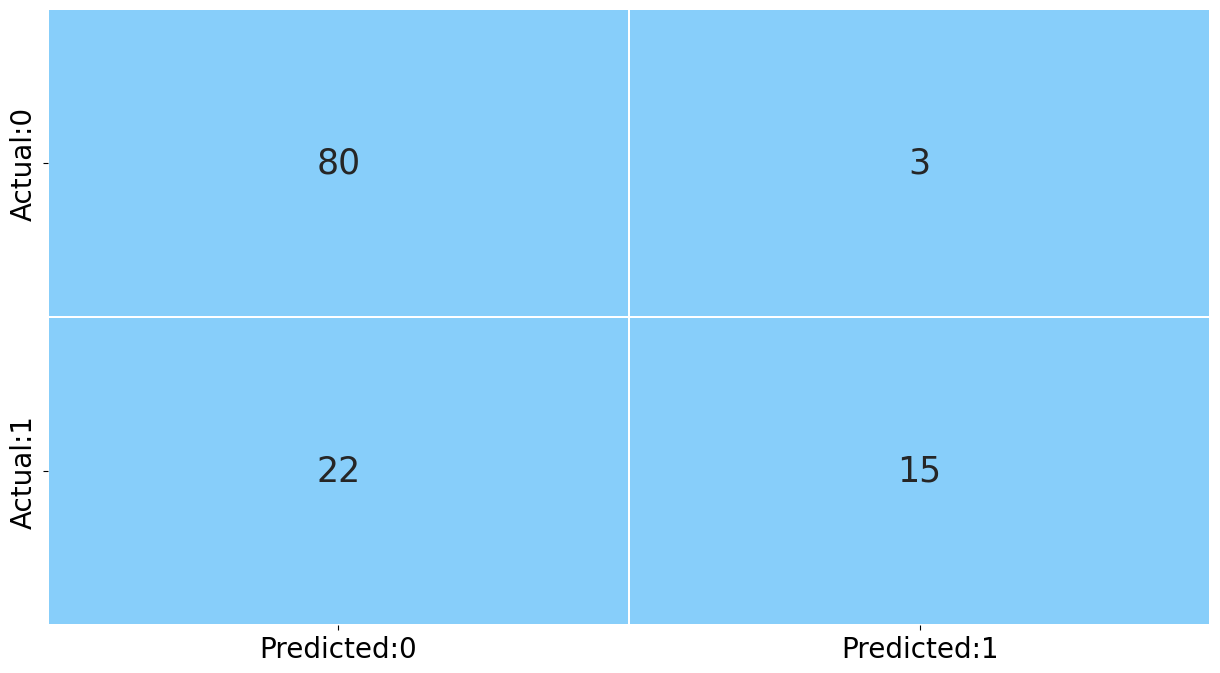

In [53]:
# calling the function to plot confusion matrix
plot_confusion_matrix(svclassifier)

In [54]:
# calling the function 'get_test_report'
test_report = get_test_report(svclassifier)
print(test_report)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        83
           1       0.83      0.41      0.55        37

    accuracy                           0.79       120
   macro avg       0.81      0.68      0.71       120
weighted avg       0.80      0.79      0.77       120



### The accuracy is 79% for this model

In [55]:
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.4305239179954442


In [56]:
# using the function 'update_score_card' to store the performance measures
update_score_card(model_name = "SVM using Gaussian Kernel")

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.658906,0.850000,0.459459,0.808333,0.485075,0.596491
1,Decision Tree,0.786389,0.617021,0.783784,0.783333,0.527416,0.690476
2,KNN Model,0.732498,0.638889,0.621622,0.775000,0.468504,0.630137
3,SVM using Gaussian Kernel,0.786389,0.833333,0.405405,0.791667,0.430524,0.545455


## Building model with SVM using Polynomial Kernel

In [57]:
# Building the model
svclassifier = SVC(kernel='poly')
# fitting the model
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [58]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [59]:
y_pred = np.array(y_pred, dtype=np.float32)
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

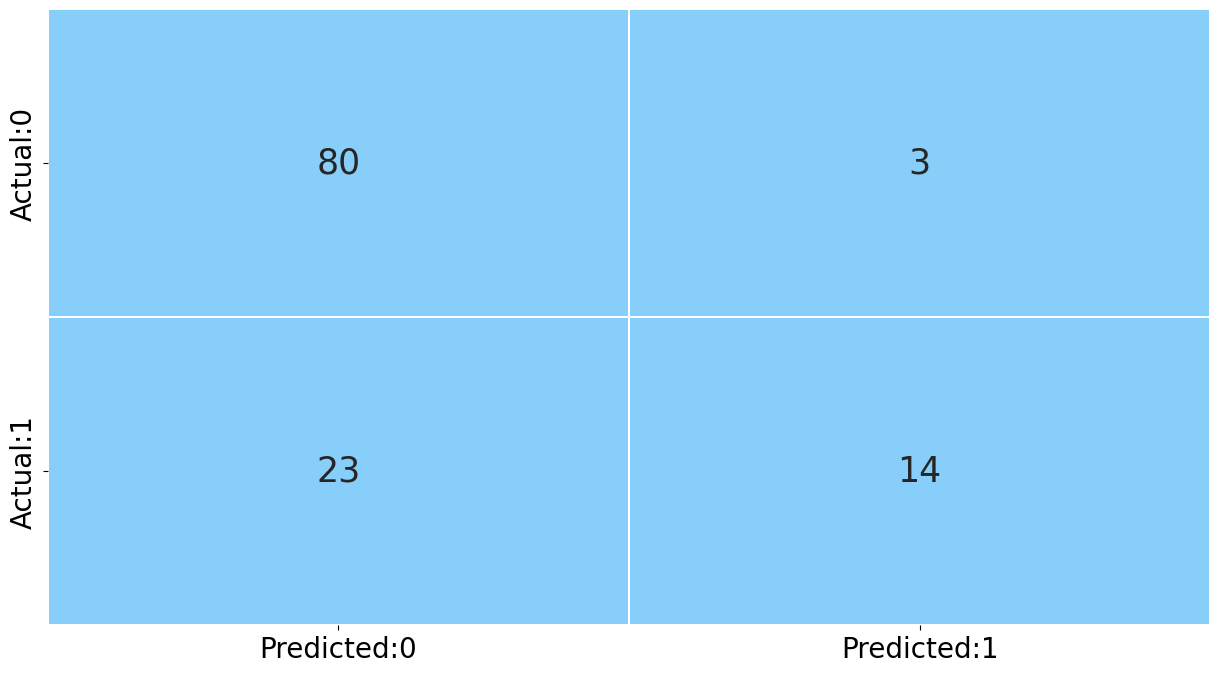

In [60]:
# calling the function to plot confusion matrix
plot_confusion_matrix(svclassifier)

In [61]:
# calling the function 'get_test_report'
test_report = get_test_report(svclassifier)
print(test_report)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        83
           1       0.82      0.38      0.52        37

    accuracy                           0.78       120
   macro avg       0.80      0.67      0.69       120
weighted avg       0.79      0.78      0.75       120



### The accuracy is 78% for this model

In [62]:
kappa = cohen_kappa_score(y_test, y_pred)

# printing the kappa value
print('kappa value:',kappa)

kappa value: 0.40252776713902716


In [63]:
# using the function 'update_score_card' to store the performance measures
update_score_card(model_name = "SVM using Polynomial Kernel")

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.658906,0.850000,0.459459,0.808333,0.485075,0.596491
1,Decision Tree,0.786389,0.617021,0.783784,0.783333,0.527416,0.690476
2,KNN Model,0.732498,0.638889,0.621622,0.775000,0.468504,0.630137
3,SVM using Gaussian Kernel,0.786389,0.833333,0.405405,0.791667,0.430524,0.545455
4,SVM using Polynomial Kernel,0.786389,0.823529,0.378378,0.783333,0.402528,0.518519


### The above table shows that the Logistic Regression model has the highest accuracy score. Therefore, it can be concluded that the Logistic Regression can be used to predict  whether a customer purchased the specific product or not.